### Machine Learning for Engineers: [Regression Overview](https://www.apmonitor.com/pds/index.php/Main/RegressionOverview)
- [Regression Overview](https://www.apmonitor.com/pds/index.php/Main/RegressionOverview)
 - Description: Regression is a type of supervised learning that predicts continuous output values from a set of input features. The goal of regression is to build a model that can accurately predict the target variable for new, unseen data.
- [Course Overview](https://apmonitor.com/pds)
- [Course Schedule](https://apmonitor.com/pds/index.php/Main/CourseSchedule)

<img align=left width=500px src='https://apmonitor.com/pds/uploads/Main/regression.png'>

#### 1D Linear Regression

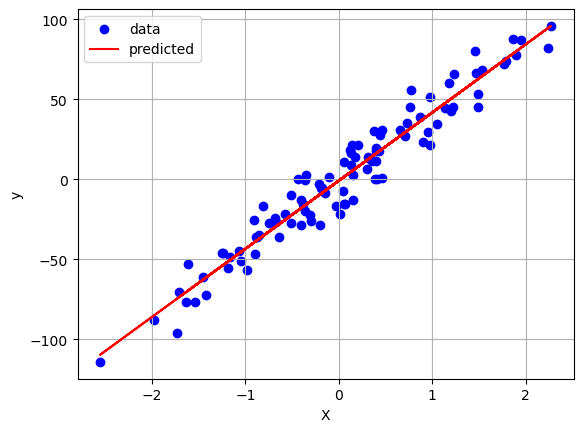

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

# Generate sample data
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=0)

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Plot the data and the fitted line
plt.scatter(X, y, color='blue', label='data')
plt.plot(X, model.predict(X), 'r-', label='predicted')
plt.xlabel('X'); plt.ylabel('y'); plt.legend()
plt.grid(); plt.savefig('linreg1D.png',dpi=300)
plt.show()

#### 2D Linear Regression

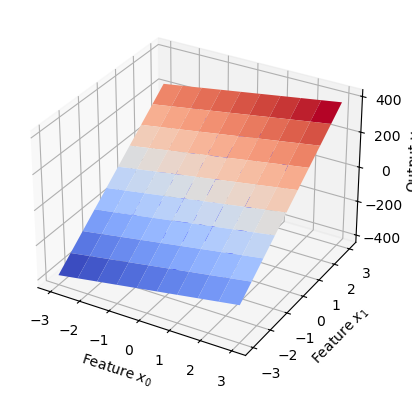

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

# Generate sample data with 2 features
X, y = make_regression(n_samples=100, n_features=2, noise=50, random_state=0)

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Plot the data and the fitted surface
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, color='blue')
x0_surf, x1_surf = np.meshgrid(np.linspace(-3, 3, 10),
                               np.linspace(-3, 3, 10))
Xp = np.array([x0_surf.ravel(),x1_surf.ravel()]).T
y_surf = model.predict(Xp).reshape(x0_surf.shape)
ax.plot_surface(x0_surf, x1_surf, y_surf, cmap='coolwarm')
ax.set_xlabel(r'Feature $x_0$')
ax.set_ylabel(r'Feature $x_1$')
ax.set_zlabel(r'Output $y$')
plt.show()

#### 5D Linear Regression

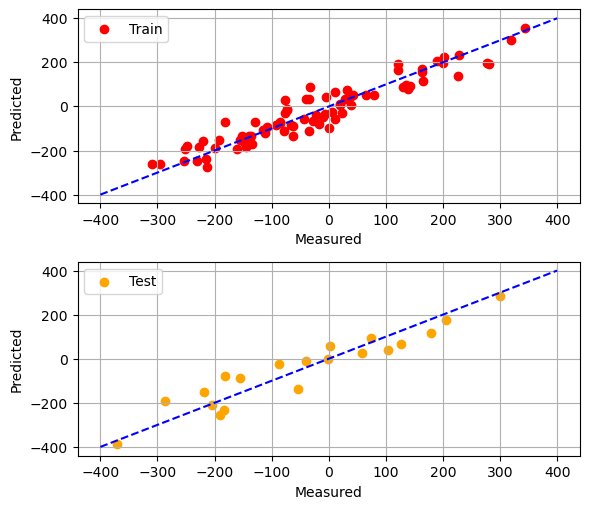

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Generate some sample data with a linear relationship
X, y = make_regression(n_samples=100, n_features=5,
                       noise=50, random_state=0)

X_train, X_test, \
y_train, y_test = train_test_split(X, y,
                                   test_size=0.2,
                                   random_state=12)

# Fit a linear regression model to the data
model = LinearRegression()
model.fit(X_train, y_train)

# Plot the data and fit
plt.figure(figsize=(6,5))
plt.subplot(2,1,1)
plt.plot([-400,400],[-400,400],'b--')
yp = model.predict(X_train)
plt.scatter(y_train, yp, color='red',label='Train')
plt.grid(); plt.tight_layout(); plt.legend()
plt.xlabel('Measured'); plt.ylabel('Predicted')

plt.subplot(2,1,2)
plt.plot([-400,400],[-400,400],'b--')
yp = model.predict(X_test)
plt.scatter(y_test, yp, color='orange',label='Test')
plt.grid(); plt.tight_layout(); plt.legend()
plt.xlabel('Measured'); plt.ylabel('Predicted')
plt.savefig('parity.png',dpi=300)
plt.show()

#### Many Regression Methods

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from lazypredict.Supervised import LazyRegressor, REGRESSORS
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

# Generate some sample data with a linear relationship
X, y = make_regression(n_samples=100, n_features=5,
                       noise=50, random_state=0)
y  = y.reshape((-1, 1))

# scale data
s0 = StandardScaler();    s1 = StandardScaler()
Xs = s0.fit_transform(X); ys = s1.fit_transform(y)

# train / test split
Xs_train, Xs_test, \
ys_train, ys_test = train_test_split(Xs, ys,
                                     test_size=0.2,
                                     random_state=12)

# exclude regressors
reg_select = []
exclude = ['LGBMRegressor', 'GammaRegressor', 'PoissonRegressor']
for x in REGRESSORS:
    if not any(x[0] == ex for ex in exclude):
        reg_select.append(x[1])

# evaluate many regressors
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None, regressors=reg_select)
models, predictions = reg.fit(Xs_train, Xs_test, ys_train, ys_test)

# print results
models.to_csv('results.csv')
models

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 39/39 [00:01<00:00, 38.45it/s]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
TransformedTargetRegressor,0.85,0.89,0.36,0.01
LinearRegression,0.85,0.89,0.36,0.01
LassoLarsIC,0.85,0.89,0.36,0.01
LassoLarsCV,0.85,0.89,0.36,0.01
LarsCV,0.85,0.89,0.36,0.02
Lars,0.85,0.89,0.36,0.01
BayesianRidge,0.85,0.89,0.36,0.01
Ridge,0.85,0.89,0.36,0.01
RidgeCV,0.85,0.89,0.36,0.01
